##### ML jupyter notebook
##### This notebook is dedicated to my finding trends and analysis of accidents

#### 1. LIBRARIES

In [1]:
!pip install seaborn
!pip install sklearn

In [2]:
# importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# used for both linear and multiple regression
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import PolynomialFeatures

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# see if we have the right file in working directory
for files in os.listdir():
    print(files)

.git
.ipynb_checkpoints
Capstone.ipynb
Data-Collisions.csv
DATA.pdf
How to pickle.txt
INTRODUCTION.pdf
Location.ipynb
NumpyTest.ipynb
Output.csv
RANDOM GUY GIT LINK.txt
README.md
TestFile.txt
THE CLASH OF NEIGHBORHOODS WEEK 4.docx
THE CLASH OF NEIGHBORHOODS WEEK 4.pdf
TorontoNeighborhood.ipynb
Untitled.ipynb
US_Accidents_June20.csv
WebApp_JupyterNB.ipynb


# Need to drop some columns cause of recurring memory issues
#### "Sunrise_Sunset" shows the period of day (i.e day or night) based on sunrise/sunset.
#### "Visibility(mi)" is being measured in miles

In [4]:
# useful columns
# USING THESE FEATURES GAVE 94.7% AND 93.4% accuracy for logistic regression and RANDOM FOREST
# useful_colmns = ["Source", "Severity", "Start_Time", "End_Time", "City", "County", "State", 
#               "Visibility(mi)", "Weather_Condition", "Sunrise_Sunset"]  

useful_colmns = ['Source','TMC','Severity','Start_Time','End_Time','Start_Lng',
                 'Start_Lat','Distance(mi)','Side','City','County','State','Temperature(F)',
                 'Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
                 'Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction',
                 'No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming',
                 'Traffic_Signal','Turning_Loop','Sunrise_Sunset']

df = pd.read_csv("US_Accidents_June20.csv", usecols = useful_colmns, nrows = 500000)

In [5]:
# df.dtypes

In [62]:
# df.rename(columns={'Visibility(mi)': 'Visibility', 'Distance(mi)': 'Distance', ''}, inplace = True)
df[df["Severity"] == 4]

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration(min)
619,MapQuest,406.0,4.0,2016-03-11 13:18:48,2016-03-11 13:48:48,39.917412,-83.014236,0.01,R,Columbus,Franklin,OH,51.8,67.0,30.34,10.0,ENE,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,2016.0,Mar,11.0,13.0,Fri,30.0
1197,MapQuest,201.0,4.0,2016-06-24 22:28:49,2016-06-24 22:58:49,37.321117,-121.899887,0.00,R,San Jose,Santa Clara,CA,66.0,65.0,29.99,10.0,WNW,Clear,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,2016.0,Jun,24.0,22.0,Fri,30.0
1901,MapQuest,201.0,4.0,2016-07-01 14:09:13,2016-07-01 14:39:13,37.630623,-122.435043,0.00,R,San Bruno,San Mateo,CA,68.0,55.0,29.89,10.0,NW,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,2016.0,Jul,1.0,14.0,Fri,30.0
4143,MapQuest,241.0,4.0,2016-07-25 14:23:33,2016-07-25 15:11:13,37.339115,-121.851807,0.00,R,San Jose,Santa Clara,CA,89.6,33.0,29.91,6.0,NNW,Haze,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,2016.0,Jul,25.0,14.0,Mon,48.0
4964,MapQuest,241.0,4.0,2016-08-01 07:44:37,2016-08-01 08:29:37,37.710648,-122.166687,0.00,R,San Leandro,Alameda,CA,62.1,80.0,29.96,10.0,WNW,Overcast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,2016.0,Aug,1.0,7.0,Mon,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499151,MapQuest,236.0,4.0,2017-07-27 08:45:10,2017-07-27 09:14:14,25.918526,-80.210953,0.00,R,Miami,Miami-Dade,FL,86.0,72.0,30.04,10.0,SE,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,2017.0,Jul,27.0,8.0,Thu,29.0
499222,MapQuest,201.0,4.0,2017-07-28 12:48:15,2017-07-28 13:38:00,26.011000,-80.166977,1.65,R,Hollywood,Broward,FL,87.1,72.0,29.97,10.0,SSE,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Day,2017.0,Jul,28.0,12.0,Fri,50.0
499226,MapQuest,201.0,4.0,2017-07-28 13:03:06,2017-07-28 13:32:11,26.011000,-80.166977,1.65,R,Hollywood,Broward,FL,87.1,72.0,29.97,10.0,SSE,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Day,2017.0,Jul,28.0,13.0,Fri,29.0
499441,MapQuest,246.0,4.0,2017-07-09 11:56:40,2017-07-09 12:25:45,33.848824,-84.431076,0.00,R,Atlanta,Fulton,GA,82.6,58.0,30.09,10.0,North,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,2017.0,Jul,9.0,11.0,Sun,29.0


#### The code below works for reading in chunks but I keep running into memory issues and TextToFileReader problems

In [7]:
# The df contains up to 3.6 million of data 
# chunkSIZE = 500000 # we're reading our data in chunks because of how large our data set is.
# dataList = []     ## list to hold the chunks for concatenation.

# # for chunk in pd.read_csv("US_Accidents_June20.csv", chunksize = chunkSIZE):
# #     dataList.append(chunk)

# # df = pd.concat(dataList, axis=0)
# chunk1 = pd.read_csv("US_Accidents_June20.csv", chunksize = 1000)

#### We need to do some filtering and preprocessing to our data to get rid of redundant entries

In [8]:
df.shape

(500000, 32)

In [9]:
# Steps in dealing with missing data values
missing_data = df.isnull()
missing_data.head(10) ## checking the tail to see if any data is missing

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# for each column in the df, we wanna look through to find any missing data
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Source
False    500000
Name: Source, dtype: int64

TMC
False    500000
Name: TMC, dtype: int64

Severity
False    500000
Name: Severity, dtype: int64

Start_Time
False    500000
Name: Start_Time, dtype: int64

End_Time
False    500000
Name: End_Time, dtype: int64

Start_Lat
False    500000
Name: Start_Lat, dtype: int64

Start_Lng
False    500000
Name: Start_Lng, dtype: int64

Distance(mi)
False    500000
Name: Distance(mi), dtype: int64

Side
False    500000
Name: Side, dtype: int64

City
False    499978
True         22
Name: City, dtype: int64

County
False    500000
Name: County, dtype: int64

State
False    500000
Name: State, dtype: int64

Temperature(F)
False    492748
True       7252
Name: Temperature(F), dtype: int64

Humidity(%)
False    492083
True       7917
Name: Humidity(%), dtype: int64

Pressure(in)
False    494259
True       5741
Name: Pressure(in), dtype: int64

Visibility(mi)
False    489459
True      10541
Name: Visibility(mi), dtype: int64

Wind_Direction
False    49

Based on the output above, ONLY 4 columns contain missing data including
City, Visibility(mi), Weather_Condition, Sunrise_Sunset

## Deal with missing data

##### How to deal with missing data?
 ###### 1. drop data
   a) drop the whole row
   b) drop the whole column
 ###### 2. replace data
   a) replace it by mean
   b) replace it by frequency
   c) replace it based on other functions e.g median

In [11]:
# Replace by frequency for City column
# df['City'].value_counts()

In [12]:
# df['City'].value_counts().idxmax()

#### Since "Houston" has the most occurence for the City column, we replace 112 missing data with "Houston"
making the new total for "Houston" 101352

In [13]:
# replace the missing 'City' values by the most frequent 
# df["City"].replace(np.nan, "Houston", inplace=True)

In [14]:
# df['City'].value_counts()

<h4>Calculate the mean value for the  'Visibility' column:</h4>

In [15]:
avg_Visibility = df['Visibility(mi)'].astype('float').mean(axis=0)
print("Average Visibility:", avg_Visibility)

Average Visibility: 9.227863334824841


<h4>Replace "NaN" by mean value:</h4>

In [16]:
df['Visibility(mi)'].replace(np.nan, avg_Visibility, inplace=True)

##### Checking if preprocessing has updated in our original dataframe

In [17]:
missing_data2 = df.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print(missing_data2[column].value_counts())
    print("")

Source
False    500000
Name: Source, dtype: int64

TMC
False    500000
Name: TMC, dtype: int64

Severity
False    500000
Name: Severity, dtype: int64

Start_Time
False    500000
Name: Start_Time, dtype: int64

End_Time
False    500000
Name: End_Time, dtype: int64

Start_Lat
False    500000
Name: Start_Lat, dtype: int64

Start_Lng
False    500000
Name: Start_Lng, dtype: int64

Distance(mi)
False    500000
Name: Distance(mi), dtype: int64

Side
False    500000
Name: Side, dtype: int64

City
False    499978
True         22
Name: City, dtype: int64

County
False    500000
Name: County, dtype: int64

State
False    500000
Name: State, dtype: int64

Temperature(F)
False    492748
True       7252
Name: Temperature(F), dtype: int64

Humidity(%)
False    492083
True       7917
Name: Humidity(%), dtype: int64

Pressure(in)
False    494259
True       5741
Name: Pressure(in), dtype: int64

Visibility(mi)
False    500000
Name: Visibility(mi), dtype: int64

Wind_Direction
False    495851
True       

In [18]:
# Replace by frequency for Weather_Condition column
df['Weather_Condition'].value_counts()

Clear                           205026
Overcast                         79031
Mostly Cloudy                    66165
Partly Cloudy                    46907
Scattered Clouds                 45714
Light Rain                       20502
Haze                              5884
Rain                              4248
Light Snow                        3962
Fair                              2456
Fog                               1711
Heavy Rain                        1326
Light Drizzle                     1130
Light Thunderstorms and Rain      1023
Thunderstorm                       838
Cloudy                             480
Thunderstorms and Rain             451
Heavy Thunderstorms and Rain       414
Snow                               404
Smoke                              335
Mist                               330
Drizzle                            216
Shallow Fog                        213
Light Freezing Rain                211
Patches of Fog                     206
Heavy Snow               

#### Since "Clear" has the most occurence for the Weather_Condition column, we replace 76138 missing data with "Clear"
making the new total for "Clear" 884340

In [19]:
df['Weather_Condition'].value_counts().idxmax()
# df.head(5)

'Clear'

In [20]:
# replace the missing 'City' values by the most frequent 
df["Weather_Condition"].replace(np.nan, "Clear", inplace=True)

In [21]:
df['Weather_Condition'].value_counts()

Clear                           215213
Overcast                         79031
Mostly Cloudy                    66165
Partly Cloudy                    46907
Scattered Clouds                 45714
Light Rain                       20502
Haze                              5884
Rain                              4248
Light Snow                        3962
Fair                              2456
Fog                               1711
Heavy Rain                        1326
Light Drizzle                     1130
Light Thunderstorms and Rain      1023
Thunderstorm                       838
Cloudy                             480
Thunderstorms and Rain             451
Heavy Thunderstorms and Rain       414
Snow                               404
Smoke                              335
Mist                               330
Drizzle                            216
Shallow Fog                        213
Light Freezing Rain                211
Patches of Fog                     206
Heavy Snow               

In [22]:
# replace Sunrise/Sunset column with the most occuring between "Night" and "Day"
df['Sunrise_Sunset'].value_counts().idxmax()

'Day'

In [23]:
# replace the missing 'NAN' values by the Day 
df["Sunrise_Sunset"].replace(np.nan, "Day", inplace=True)

In [24]:
missing_data3 = df.isnull()
for column in missing_data3.columns.values.tolist():
    print(column)
    print(missing_data3[column].value_counts())
    print("")

Source
False    500000
Name: Source, dtype: int64

TMC
False    500000
Name: TMC, dtype: int64

Severity
False    500000
Name: Severity, dtype: int64

Start_Time
False    500000
Name: Start_Time, dtype: int64

End_Time
False    500000
Name: End_Time, dtype: int64

Start_Lat
False    500000
Name: Start_Lat, dtype: int64

Start_Lng
False    500000
Name: Start_Lng, dtype: int64

Distance(mi)
False    500000
Name: Distance(mi), dtype: int64

Side
False    500000
Name: Side, dtype: int64

City
False    499978
True         22
Name: City, dtype: int64

County
False    500000
Name: County, dtype: int64

State
False    500000
Name: State, dtype: int64

Temperature(F)
False    492748
True       7252
Name: Temperature(F), dtype: int64

Humidity(%)
False    492083
True       7917
Name: Humidity(%), dtype: int64

Pressure(in)
False    494259
True       5741
Name: Pressure(in), dtype: int64

Visibility(mi)
False    500000
Name: Visibility(mi), dtype: int64

Wind_Direction
False    495851
True       

##### Apply the concept of frequence and averaging to the outliers in the columns wind_direction, pressure, humidity and temperature respectively

In [25]:
freq_diretion = df['Wind_Direction'].value_counts().idxmax()
df["Wind_Direction"].replace(np.nan, freq_diretion, inplace=True)

avg_Pressure = df['Pressure(in)'].astype('float').mean(axis=0)
df['Pressure(in)'].replace(np.nan, avg_Pressure, inplace=True)

avg_Humidity = df['Humidity(%)'].astype('float').mean(axis=0)
df['Humidity(%)'].replace(np.nan, avg_Humidity, inplace=True)

avg_Temperature = df['Temperature(F)'].astype('float').mean(axis=0)
df['Temperature(F)'].replace(np.nan, avg_Temperature, inplace=True)

In [26]:
missing_data4 = df.isnull()
for column in missing_data4.columns.values.tolist():
    print(column)
    print(missing_data4[column].value_counts())
    print("")

Source
False    500000
Name: Source, dtype: int64

TMC
False    500000
Name: TMC, dtype: int64

Severity
False    500000
Name: Severity, dtype: int64

Start_Time
False    500000
Name: Start_Time, dtype: int64

End_Time
False    500000
Name: End_Time, dtype: int64

Start_Lat
False    500000
Name: Start_Lat, dtype: int64

Start_Lng
False    500000
Name: Start_Lng, dtype: int64

Distance(mi)
False    500000
Name: Distance(mi), dtype: int64

Side
False    500000
Name: Side, dtype: int64

City
False    499978
True         22
Name: City, dtype: int64

County
False    500000
Name: County, dtype: int64

State
False    500000
Name: State, dtype: int64

Temperature(F)
False    500000
Name: Temperature(F), dtype: int64

Humidity(%)
False    500000
Name: Humidity(%), dtype: int64

Pressure(in)
False    500000
Name: Pressure(in), dtype: int64

Visibility(mi)
False    500000
Name: Visibility(mi), dtype: int64

Wind_Direction
False    500000
Name: Wind_Direction, dtype: int64

Weather_Condition
False

In [27]:
# DROP THE REMAINING EMPTY CELLS FROM THE COLUMN CITY TO CONCLUDE THE DATA CLEANSING SECTION
df.isnull().mean()

Source               0.000000
TMC                  0.000000
Severity             0.000000
Start_Time           0.000000
End_Time             0.000000
Start_Lat            0.000000
Start_Lng            0.000000
Distance(mi)         0.000000
Side                 0.000000
City                 0.000044
County               0.000000
State                0.000000
Temperature(F)       0.000000
Humidity(%)          0.000000
Pressure(in)         0.000000
Visibility(mi)       0.000000
Wind_Direction       0.000000
Weather_Condition    0.000000
Amenity              0.000000
Bump                 0.000000
Crossing             0.000000
Give_Way             0.000000
Junction             0.000000
No_Exit              0.000000
Railway              0.000000
Roundabout           0.000000
Station              0.000000
Stop                 0.000000
Traffic_Calming      0.000000
Traffic_Signal       0.000000
Turning_Loop         0.000000
Sunrise_Sunset       0.000000
dtype: float64

In [28]:
# So in total we should only be dropping 22 rows from the city column
df.dropna(subset=df.columns[df.isnull().mean()!=0], how='any', axis=0, inplace=True)
df.shape

(499978, 32)

## At this point in the script, all the NAN values have wither been replaced by most occuring or average values of the column in question

In [29]:
df.head(5)
df.shape

(499978, 32)

In [30]:
# df.to_csv('Output.csv', index=True)

#### Let's extract the year, month, day, weekday and time for easy processing of this values

In [31]:
df.head(5)

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,R,Dayton,Montgomery,OH,36.9,91.0,29.68,10.0,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,L,Reynoldsburg,Franklin,OH,37.9,100.0,29.65,10.0,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,R,Williamsburg,Clermont,OH,36.0,100.0,29.67,10.0,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
3,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,R,Dayton,Montgomery,OH,35.1,96.0,29.64,9.0,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,R,Dayton,Montgomery,OH,36.0,89.0,29.65,6.0,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day


In [32]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499978 entries, 0 to 499999
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Source              499978 non-null  object        
 1   TMC                 499978 non-null  float64       
 2   Severity            499978 non-null  int64         
 3   Start_Time          499978 non-null  datetime64[ns]
 4   End_Time            499978 non-null  datetime64[ns]
 5   Start_Lat           499978 non-null  float64       
 6   Start_Lng           499978 non-null  float64       
 7   Distance(mi)        499978 non-null  float64       
 8   Side                499978 non-null  object        
 9   City                499978 non-null  object        
 10  County              499978 non-null  object        
 11  State               499978 non-null  object        
 12  Temperature(F)      499978 non-null  float64       
 13  Humidity(%)         499978 no

##### Validate to make sure time duration is not negative for any given row

In [33]:
df[td][df[td] <=0]

69719     -0.0
69720     -0.0
69721     -0.0
69722     -1.0
69723     -1.0
309387   -30.0
309388   -30.0
Name: Time_Duration(min), dtype: float64

In [34]:
# Since we have some entries with negative time values, let's drop those rows by changing their 
# entries to NAN values and then using dropna to drop the values respectively
negative_time = df[td] <= 0

# Set outliers to NAN
df[negative_time] = np.nan

# Drop rows with negative td
df.dropna(subset=[td], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499971 entries, 0 to 499999
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Source              499971 non-null  object        
 1   TMC                 499971 non-null  float64       
 2   Severity            499971 non-null  float64       
 3   Start_Time          499971 non-null  datetime64[ns]
 4   End_Time            499971 non-null  datetime64[ns]
 5   Start_Lat           499971 non-null  float64       
 6   Start_Lng           499971 non-null  float64       
 7   Distance(mi)        499971 non-null  float64       
 8   Side                499971 non-null  object        
 9   City                499971 non-null  object        
 10  County              499971 non-null  object        
 11  State               499971 non-null  object        
 12  Temperature(F)      499971 non-null  float64       
 13  Humidity(%)         499971 no

In [35]:
# Validate if there's still misssing values and drop them
df.head()
# df.isnull().mean()

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,MapQuest,201.0,3.0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,R,Dayton,Montgomery,OH,36.9,91.0,29.68,10.0,Calm,Light Rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,2016.0,Feb,8.0,5.0,Mon,314.0
1,MapQuest,201.0,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,L,Reynoldsburg,Franklin,OH,37.9,100.0,29.65,10.0,Calm,Light Rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,2016.0,Feb,8.0,6.0,Mon,30.0
2,MapQuest,201.0,2.0,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,R,Williamsburg,Clermont,OH,36.0,100.0,29.67,10.0,SW,Overcast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Night,2016.0,Feb,8.0,6.0,Mon,30.0
3,MapQuest,201.0,3.0,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,R,Dayton,Montgomery,OH,35.1,96.0,29.64,9.0,SW,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Night,2016.0,Feb,8.0,7.0,Mon,30.0
4,MapQuest,201.0,2.0,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,R,Dayton,Montgomery,OH,36.0,89.0,29.65,6.0,SW,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Day,2016.0,Feb,8.0,7.0,Mon,30.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499971 entries, 0 to 499999
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Source              499971 non-null  object        
 1   TMC                 499971 non-null  float64       
 2   Severity            499971 non-null  float64       
 3   Start_Time          499971 non-null  datetime64[ns]
 4   End_Time            499971 non-null  datetime64[ns]
 5   Start_Lat           499971 non-null  float64       
 6   Start_Lng           499971 non-null  float64       
 7   Distance(mi)        499971 non-null  float64       
 8   Side                499971 non-null  object        
 9   City                499971 non-null  object        
 10  County              499971 non-null  object        
 11  State               499971 non-null  object        
 12  Temperature(F)      499971 non-null  float64       
 13  Humidity(%)         499971 no

In [37]:
# Double Chack to make sure we have non-negative time durations
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [38]:
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median
# n=3

# median = df[td].median()
# std = df[td].std()
# outliers = (df[td] - median).abs() > std*n

# # Set outliers to NAN
# df[outliers] = np.nan

# # Fill NAN with median
# df[td].fillna(median, inplace=True)

# df.info()

In [39]:
# Since our data is now properlly formatted and ready for analysis, 

# Set the list of features to include in Machine Learning
# features=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)',
#              'Side','City','County','State','Temperature(F)','Humidity(%)',
#              'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition',
#              'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
#              'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop',
#              'Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

# max hour is 23 which means time is in the 24hour format
features=['Severity','Start_Lng','Start_Lat','Temperature(F)','Humidity(%)','Pressure(in)','Hour']

df_final = df[features].copy()
df_final

,Severity,Start_Lng,Start_Lat,Temperature(F),Humidity(%),Pressure(in),Hour
0,3.0,-84.058723,39.865147,36.9,91.0,29.68,5.0
1,2.0,-82.831184,39.928059,37.9,100.0,29.65,6.0
2,2.0,-84.032608,39.063148,36.0,100.0,29.67,6.0
3,3.0,-84.205582,39.747753,35.1,96.0,29.64,7.0
4,2.0,-84.188354,39.627781,36.0,89.0,29.65,7.0
...,...,...,...,...,...,...,...
499995,2.0,-84.381500,33.747414,78.1,87.0,30.03,7.0
499996,3.0,-84.493874,33.765018,77.0,94.0,30.03,7.0
499997,2.0,-84.442657,33.751457,77.0,94.0,30.03,7.0
499998,3.0,-84.488449,33.799355,77.0,94.0,30.03,7.0


In [40]:
# # Set state
# state='PA'

# # Select the state of Pennsylvania
# df_state=df_final.loc[df_final.State==state].copy()
# df_state.drop('State',axis=1, inplace=True)

# # Set county
# county='Montgomery'

# # Select the county of Montgomery from the state of PA
# df_county=df_state.loc[df_state.County==county].copy()
# df_county.drop('County',axis=1, inplace=True)
# df_county.shape

In [41]:
# Generate dummies for categorical data
# df_county_dummy = pd.get_dummies(df_county, drop_first=True)
# df_county_dummy.head()

In [42]:
df_analysis = df_final

# Target for the prediction
target='Severity'

# Create arrays for the features and the response variable

# set X and y
X = df_analysis.drop(target, axis=1)
y = df_analysis[[target]]

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# y.head()

## Predict the accident severity with various supervised machine learning algorithms 

In [43]:
# List of classification algorithms
algo_lst=['Logistic Regression', 'Linear Regression', 'Miltiple-Linear Regression', 'Polynomial Regression']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]
X.head()

,Start_Lng,Start_Lat,Temperature(F),Humidity(%),Pressure(in),Hour
0,-84.058723,39.865147,36.9,91.0,29.68,5.0
1,-82.831184,39.928059,37.9,100.0,29.65,6.0
2,-84.032608,39.063148,36.0,100.0,29.67,6.0
3,-84.205582,39.747753,35.1,96.0,29.64,7.0
4,-84.188354,39.627781,36.0,89.0,29.65,7.0


#### A. Logistic Regression

In [57]:
# col_mask=df_analysis.isnull().any(axis=0) 
# col_mask

# row_mask=df.isnull().any(axis=1)
# row_mask

# np.isfinite(X_train).all()
X_train.isnull().values.all()

False

In [45]:
# Logistic regression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[Logistic regression algorithm] accuracy_score: 0.623.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
y_test

,Severity
45935,2.0
165219,2.0
374052,2.0
32947,2.0
176308,2.0
...,...
254091,2.0
18311,2.0
211828,2.0
258972,2.0


In [47]:
y_pred

array([2., 2., 2., ..., 2., 2., 2.])

#### B. Linear Regression

In [48]:
# # # set X and y
# y1 = df_county[['Severity']]
# X1 = df_county[['Time_Duration(min)']]

# # LinearRegression()
# lr = LinearRegression()
# lr.fit(X1, y1)

# acc1 = lr.score(X1, y1)
# print(acc1)
# yhat = lr.predict([[314]])
# print(yhat)

# accuracy_lst.append(acc1)
# # features = ['Source','Severity','City','County','State','Visibility', 
# #              'Weather_Condition','Hour','Weekday', 'Time_Duration(min)']

#### C. Multiple Linear Rgression

In [49]:
# accuracy_lst

In [50]:
# # set X and y
# y2 = df_analysis[['Severity']]
# X2 = df_analysis.drop(target, axis=1)

# lr2 = LinearRegression()
# lr2.fit(X2, y2)

# acc2 = lr2.score(X2, y2)
# print(acc2)
# yhat2 = lr2.predict(X2)
# print(yhat2)

# accuracy_lst.append(acc2)

In [51]:
# accuracy_lst

#### 3. Polynomial Features on Multiple Linear Regression

###### This method doesn't work properly cause it raises memory problems

In [52]:
# Rsqu_test = []

# order = [1,2,3,4,5]
# # lr = LinearRegression()

# # for n in order:
# #     pr = PolynomialFeatures(degree=n)
    
# #     X_train_pr = pr.fit_transform(X_train)
# #     X_test_pr = pr.fit_transform(X_test)
    
# #     lr.fit(X_train_pr, y_train)
    
# #     Rsqu_test.append(lr.score(X_test_pr, y_test))
   
# lr = LinearRegression()
# pr = PolynomialFeatures(degree=3)

# X_train_pr = pr.fit_transform(X_train)
# X_test_pr = pr.fit_transform(X_test)

# lr.fit(X_train_pr, y_train)

# Rsqu_test.append(lr.score(X_test_pr, y_test))

##### 4. Random Forest

In [53]:
# Random Forest algorithm
rnd_Clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
rnd_Clf.fit(X_train,y_train)

# And predict using the testing set y_pred=rnd_Clf.predict(X_test)
y_pred = rnd_Clf.predict(X_test)


# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

<ipython-input-53-b64d3fa5d97f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_Clf.fit(X_train,y_train)


[Randon forest algorithm] accuracy_score: 0.875.


In [81]:
accuracy_lst

[0.6230798975945384, 0.8754333564456771]

No handles with labels found to put in legend.


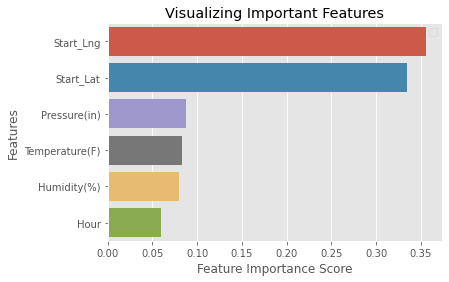

In [55]:
# Let's observe the features that really contribute to the accuracy of our prediction
important_features = pd.Series(rnd_Clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=11
sns.barplot(x=important_features[:k], y=important_features.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [65]:
# NEED TO PICKLE OUR MODEL
# import pickle 
# example_dict = {1:"6", 2:"3", 3:"F"}

# pickle_out = open("dict.picle", "wb")
# pickle.dump(example_dict, pickle_out)
# pickle_out.close()

# # read back pickled object into the program again
# pickle_in = open("dic.pickle", "rb")
# loaded_dict = picle.load(pickle_in)

new_data = [[37.630623, -122.435043, 14, 29.91, 89.6, 33.0]]
X_new = pd.DataFrame(new_data, columns = ["Start_Lat", "Start_Lng", "Hour", "Pressure(in)", "Temperature(F)", "Humidity(%)"]) 

# And predict using the testing set y_pred=rnd_Clf.predict(X_test)
y_new = rnd_Clf.predict(X_new)
print(y_new)

[2.]
